# **Download to, and open this notebook (ipynb) file from your google colab account by logging into https://colab.research.google.com/**

# **Mount google drive to colab** 

This step would let your ipynb file access your test image file, pretrained model weights etc. (i.e., if your model+test files are in your google cloud).

Disclaimer:
1. Please know that it will not grant me access to your Google drive in anyway. You are simply granting **your** Google colab/ipynb scripts an access to **your** Google drive.

2. There is no need to run this step, if you are not using Google colab to run this experiment, but running experiments on a local/cloud-based machine that you own. In that case, simply skip this step, but make sure to copy over/link files appropriately.

Once you run the cell below, a link will appear. Simply click on the link, choose/login to the google drive account you want this notebook to have access to, then simply copy paste the auhorization code that appears on your screen, press enter. (screenshots below)


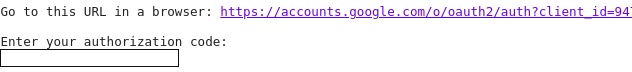

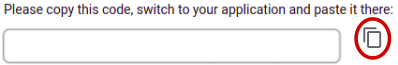

In [1]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


## **Git clone TabStructNet Repository**

In [2]:
!git clone https://github.com/sachinraja13/TabStructNet

Cloning into 'TabStructNet'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 709 (delta 24), reused 34 (delta 6), pack-reused 630
Receiving objects: 100% (709/709), 191.59 MiB | 32.07 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Checking out files: 100% (604/604), done.


# **Download** (/make accessible) **the pretrained model file**

**Notice that README at TabStructNet repository states the following:**

```
Download necessary files. For download locations and links please refer to note.txt files in the following folders:
1. https://github.com/sachinraja13/TabStructNet/tree/master/coco_model/coco
2. https://github.com/sachinraja13/TabStructNet/tree/master/trained_model/tab/annotations
3. https://github.com/sachinraja13/TabStructNet/tree/master/trained_model/tab/logs/tab20200821T0923
```

To run evaluation on *unseen* data (i.e., your own table images), you need to worry about only point number 3. above, i.e.,
https://github.com/sachinraja13/TabStructNet/blob/master/trained_model/tab/logs/tab20200821T0923/note.txt
i.e. the pretrained model architecture + weights downloaded, to be made accessible by the repository.

One can simply create a local link to the model, stored as a google drive file. This trick is sufficient to run evaluation of the TabStructNet model using google colab. Open up the link https://drive.google.com/drive/folders/1t5Io8q_g9MkM2KyYXG3s9b0NOVo3RIDw?usp=sharing , right click and add a shortcut to your drive (screenshot below).

(Alternately, of course, you can have it downloaded to the disk you are running evaluation from, under the `logs/tab2020...` directory stated above).




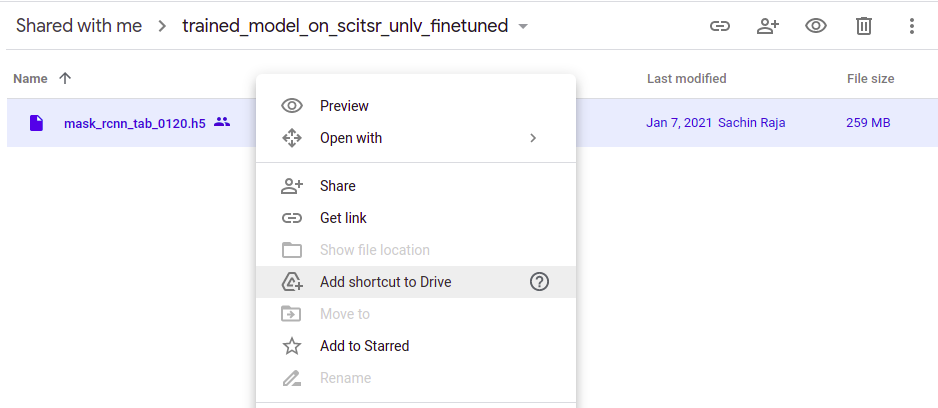

In [3]:
# Copy the h5 file with the pretrained weights into `TabStructNet/trained_model/tab/logs/tab20200821T0923`
# Please make sure that you enter the exact source path below, 
#     i.e. the path to necessary h5 file in your google drive.
# !ln -s <SOURCE> "/content/TabStructNet/trained_model/tab/logs/tab20200821T0923/mask_rcnn_tab_0120.h5"
!ln -s "/content/drive/MyDrive/Colab Notebooks/NewFilesTabStructNet/models/mask_rcnn_tab_0120.h5" "/content/TabStructNet/trained_model/tab/logs/tab20200821T0923/mask_rcnn_tab_0120.h5"
!ln -s "/content/drive/MyDrive/Colab Notebooks/NewFilesTabStructNet/models/mask_rcnn_coco.h5" "/content/TabStructNet/coco_model/coco/mask_rcnn_coco.h5"

# **Install the library dependencies with version numbers exactly as stated**: 

Install the stated versions of `tensorflow`, `keras` and `pycocotools`, since have I experienced that any deviation, alternate version can lead you to `No module found` error. Let's install simply keras==2.0.8 and tensorflow=1.13.1 by first uninstalling any existing ones.

In [4]:
!pip uninstall -y -q tensorflow keras 
!pip install -q tensorflow_gpu==1.13.1 pycocotools keras==2.0.8  

     |████████████████████████████████| 345.2MB 35kB/s 
     |████████████████████████████████| 276kB 54.8MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 3.2MB 54.9MB/s 
     |████████████████████████████████| 368kB 47.8MB/s 
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.


> **Verify keras and tensorflow versions, make sure they are successfully invoked**

In [6]:
import tensorflow as tf
import keras as K
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print(tf.__version__)
print(K.__version__)

1.13.1
2.0.8


# **Create the necessary JSON file**

The evaluation run would terminate prematurely if you do not have a necessary JSON file -- just as I have noted in the reproprodcibility report _"How effective is TabStructNet in capturing the structure of a table-image into an XML? : A reproducibility report"_ under _"Section 2.2 Make sure to generate a JSON file at ‘/trained_model/tab/annotations/’ "_. As you may notice, the TabStructNet repository at the link above does not have a resource to create one for you currently (31.01.2021) for running evaluation on your own table images. 

To create JSON file, simply download the scripts from the following repository and follow the instructions noted herein later.

Thus, we run now: **`git clone tableimg_to_xml` to download `eval_json_generator`** 

  
> ####  **Script credits for this step:** 
> In summary: _Sachin Raja_
>
> In detail: All the scripts in this folder and instructions in terms of how to use these (except the ipynb file you are running and looking at now) were provided to me by email by the first author of _"Raja, S., Mondal, A., & Jawahar, C. V. (2020, August). Table Structure Recognition using Top-Down and Bottom-Up Cues. In European Conference on Computer Vision (pp. 70-86). Springer, Cham."_, i.e., by Sachin Raja. I am making these available to you in the repository called `tableimg_to_xml` for the sake of reproducibility of the experiments, to simplify a little evaluation of the pretrained TabStructNet model.




In [7]:
!git clone https://github.com/dikuiiq/tableimg_to_xml.git

Cloning into 'tableimg_to_xml'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


**How to generate mock JSON**
(Credits: Sachin Raja)

1. Copy test images to `eval_json_generator/input_images`
2. Run `eval_xml_generator.py`
3. Run `make_json.py`
4. Copy `eval_json_generator/images/*.jpg` to  `trained_model/tab/val2014`.
5. Copy `eval_json_generator/json/*.json` to `trained_model/tab/annotations`.

In [8]:
# Rename the pre-existing val2014 folder with a new one featuring your own test images
!mv "/content/TabStructNet/trained_model/tab/val2014/" "/content/TabStructNet/trained_model/tab/val2014_/"
!mkdir "/content/TabStructNet/trained_model/tab/val2014/"

In [9]:
# 1. Copy test images to `eval_json_generator/input_images` (you can alternately create a symbolic link)
# However, `input_images` folder does not exist under 'eval_json_generator/', we need to create that one first.
!mkdir "/content/tableimg_to_xml/eval_json_generator/input_images/"
!ln -s "/content/drive/MyDrive/Colab Notebooks/NewFilesTabStructNet/data/my_custom_data/table_taa.png" "/content/tableimg_to_xml/eval_json_generator/input_images/table_taa.png"
!ln -s "/content/drive/MyDrive/Colab Notebooks/NewFilesTabStructNet/data/my_custom_data/SewaDemoTable.png" "/content/tableimg_to_xml/eval_json_generator/input_images/SewaDemoTable.png"

In [10]:
# 2. Run eval_xml_generator.py
%cd /content/tableimg_to_xml/eval_json_generator/
!python eval_xml_generator.py

/content/tableimg_to_xml/eval_json_generator
input_images/table_taa.png
length_table_list==> 1
input_images/SewaDemoTable.png
length_table_list==> 1


In [11]:
# 3. Run make_json.py
%cd /content/tableimg_to_xml/eval_json_generator/
!python make_json.py

/content/tableimg_to_xml/eval_json_generator
xml==> input_images_table_taa.xml
xml==> input_images_SewaDemoTable.xml


In [12]:
#4. Copy eval_json_generator/images/*.jpg to trained_model/tab/val2014.
!cp /content/tableimg_to_xml/eval_json_generator/images/*.jpg /content/TabStructNet/trained_model/tab/val2014/.

In [13]:
#5. Copy eval_json_generator/json/*.json to trained_model/tab/annotations.
!cp /content/tableimg_to_xml/eval_json_generator/json/*.json /content/TabStructNet/trained_model/tab/annotations/.

In [14]:
# Change to directory TabStructNet to launch the evaluation script
%cd /content/TabStructNet/

/content/TabStructNet


In [15]:
# Remove any pre-existing mrcnn packages, make mrcnn directory from TabStructNet accessible to tabnet.py
!pip uninstall -y mrcnn
!mv /content/TabStructNet/mrcnn /content/TabStructNet/samples/tabnet/.

# **Edit tabnet.py to make the run less memory intensive, CPU-friendly as necessary.**

1. Open up `TabStructNet/samples/tabnet/tabnet.py` to set number of images to 2 from 5000 (line 479)

> 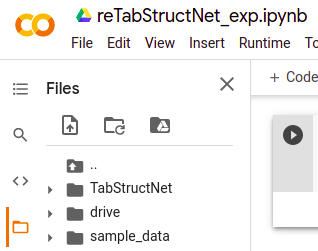


2. If GPU runs fail due to malloc errors, try using CPU for evaluation.

To do this copy paste the following, after first commenting out the lines 46 and 47.

```
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

config = tf.ConfigProto( device_count = {'GPU': 0} )
```
3. Likewise, you can modify `TabStructNet/samples/tabnet/mrcnn/config.py`, for example: 
```
PRE_NMS_LIMIT = 1000
POST_NMS_ROIS_TRAINING = 750
POST_NMS_ROIS_INFERENCE = 750
DETECTION_MAX_INSTANCES = 200
MAX_GT_INSTANCES = 200
```
4. Don't forget to modify line 433 of `TabStructNet/samples/tabnet/tabnet.py` from `tab_results = tab.loadRes(results[0])`

to `tab_results = tab.loadRes(results[0])`

cf. _"Section 2.4 The current script leads to ‘TypeError’, minor fix necessary"_ from _"How effective is TabStructNet in capturing the structure of a table-image into an XML? : A reproducibility report"_

In [16]:
# Run evaluation script
!python samples/tabnet/tabnet.py evaluate --dataset="trained_model/tab" --model="trained_model/tab/logs/tab20200821T0923/mask_rcnn_tab_0120.h5"

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

# **Generate XML output files**

**How to generate XML files** 
(Credits: Sachin Raja)
1. Execute the TabStructNet model for evaluation as specified in the TabStructNet repository's `README`.
2. Copy the 4 result folders generated in the `trained_model/tab` directory to the results folder inside the `rename_output_files` folder.
3. Execute `rename_maskrcnn_result_files.py`
4. Copy the 4 result folders generated inside `rename_output_files/rename_results` to `xml_generating_postprocessor directory`.
5. Copy the validation JPEG images inside `xml_generating_postprocessor/gt_without_box` folder.
6. Execute `cell_postprocessor_adj.py` 

XMLs are generated in `processed_xmls` folder

In [17]:
# 2. Copy "trained_model/tab/result_*" to "rename_output_files/results/."
!cp -rf /content/TabStructNet/trained_model/tab/result* "/content/TabStructNet/rename_output_files/results/."

In [18]:
# 3. Execute rename_maskrcnn_result_files.py
# But first, you also need to copy over instances_val2014.json to directory `GT_json_file` 
#           (a step missing in the instruction-list above).
# But to be fair, it is mentioned in the note.txt (but not in TabStructNet README). 
# Ideally, the process of simple copying over needs to be (and could have easily been) streamlined
!cp -rf "/content/tableimg_to_xml/eval_json_generator/json/instances_val2014.json" "/content/TabStructNet/rename_output_files/GT_json_file/."

# NOW 3. Execute rename_maskrcnn_result_files.py
%cd /content/TabStructNet/rename_output_files
!python rename_maskrcnn_result_files.py

/content/TabStructNet/rename_output_files
[Errno 2] No such file or directory: 'rename_results/result_jpg/'
cannot remove rename_results/result_jpg/
cannot remove rename_results/result_text/
cannot remove rename_results/result_row_pkl/
cannot remove rename_results/result_col_pkl/
['input_images_table_taa.jpg', 'input_images_SewaDemoTable.jpg']
1001
1000


In [19]:
# 4. Copy "rename_output_files/rename_results" to "xml_generating_postprocessor"
!cp -rf /content/TabStructNet/rename_output_files/rename_results/result* "/content/TabStructNet/xml_generating_postprocessor/."

In [21]:
# 5. Copy the validation JPEG images inside xml_generating_postprocessor/gt_without_box folder.
!cp -rf /content/TabStructNet/trained_model/tab/val2014/*.jpg "/content/TabStructNet/xml_generating_postprocessor/gt_without_box/."

In [22]:
# 6. Execute cell_postprocessor_adj.py
%cd /content/TabStructNet/xml_generating_postprocessor
!python  cell_postprocessor_adj.py


/content/TabStructNet/xml_generating_postprocessor
*******
result_text/input_images_SewaDemoTable.txt
Num columns identified: 8
Num skipped: 0
Num rows identified: 11
Num skipped: 10
*******
result_text/input_images_table_taa.txt
Num columns identified: 4
Num skipped: 0
Num rows identified: 46
Num skipped: 0


# **A newly generated XMLs can be found under `TabStructNet/xml_generating_postprocessor/processed_xml`**


